In [1]:
import tensorflow as tf

In [2]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,Dropout,Activation
from keras.optimizers import Adam

In [3]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=(x_train/255.0,x_test/255.0)

In [4]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
                            ])

In [5]:
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
tf_callbacks=tf.keras.callbacks.TensorBoard(log_dir='logs/fit',histogram_freq=1)

In [7]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,callbacks=tf_callbacks)

Epoch 1/10


1875/1875 [==============================] - 18s 7ms/step - loss: 0.6347 - accuracy: 0.8347 - val_loss: 0.3442 - val_accuracy: 0.9070
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3463 - accuracy: 0.9027 - val_loss: 0.2796 - val_accuracy: 0.9224
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2919 - accuracy: 0.9177 - val_loss: 0.2432 - val_accuracy: 0.9329
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2575 - accuracy: 0.9276 - val_loss: 0.2194 - val_accuracy: 0.9386
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2325 - accuracy: 0.9347 - val_loss: 0.1997 - val_accuracy: 0.9417
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2117 - accuracy: 0.9405 - val_loss: 0.1849 - val_accuracy: 0.9479
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1943 - accuracy: 0.9455 - val_loss: 0.1704 - val_

In [8]:
%load_ext tensorboard

In [11]:
tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 5908), started 1 day, 1:31:17 ago. (Use '!kill 5908' to kill it.)

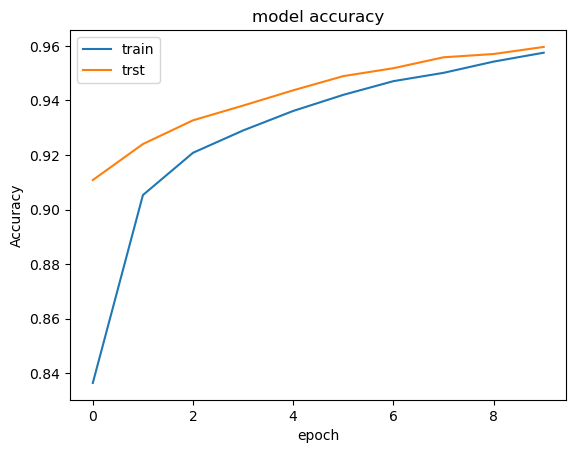

In [54]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','trst'],loc='upper left')
plt.show()

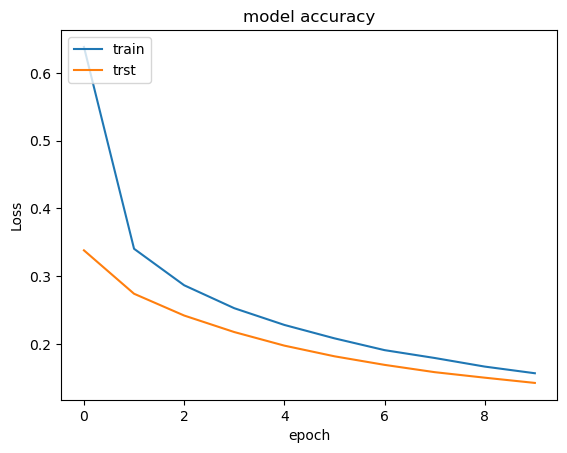

In [55]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train','trst'],loc='upper left')
plt.show()